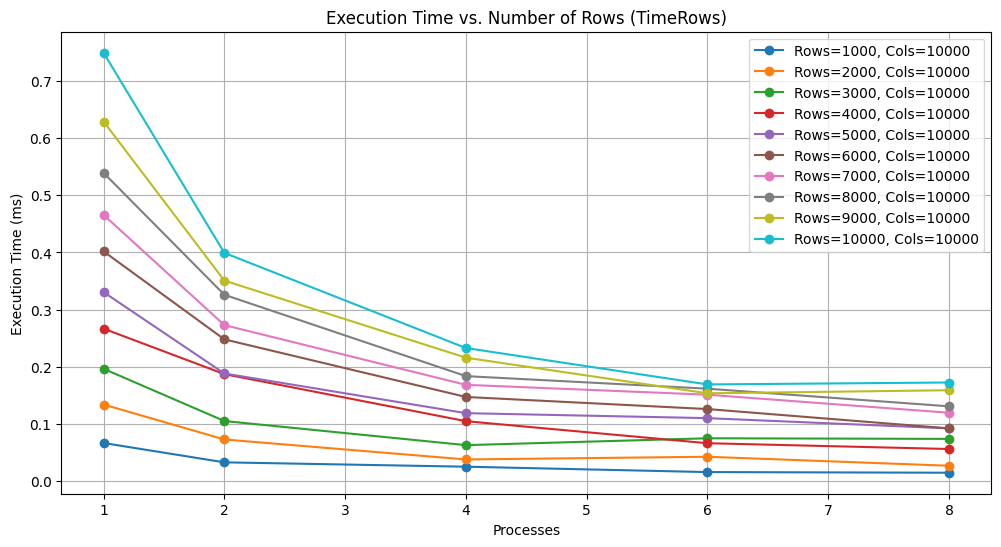

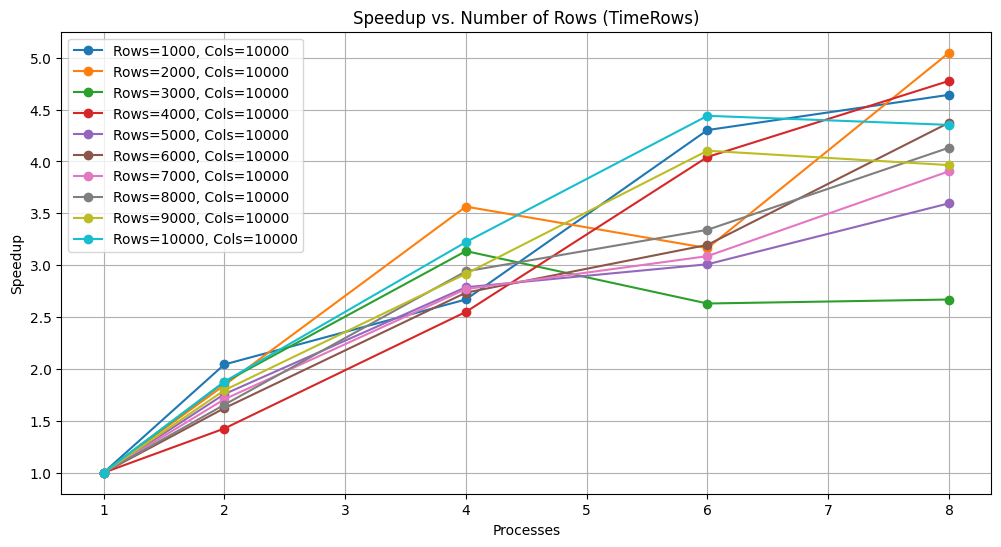

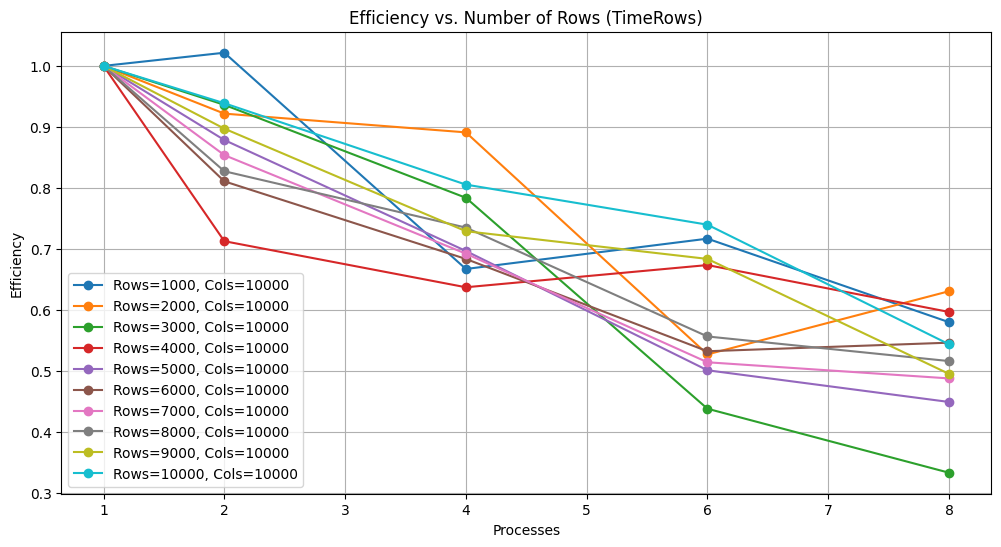

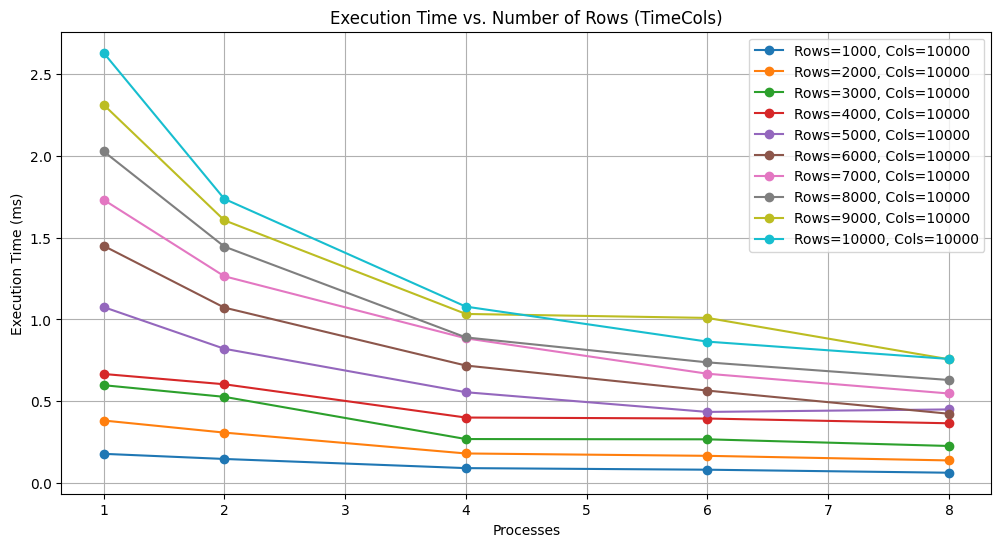

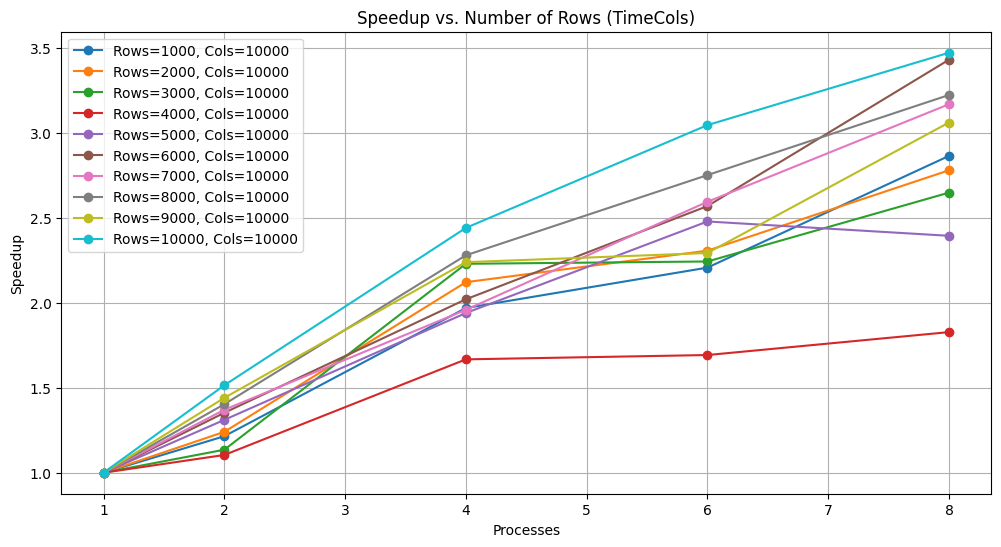

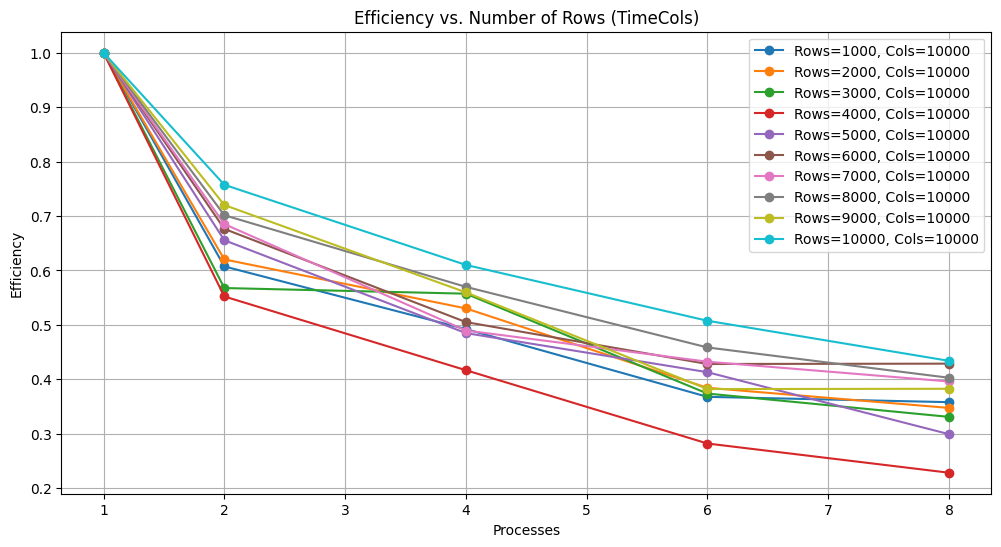

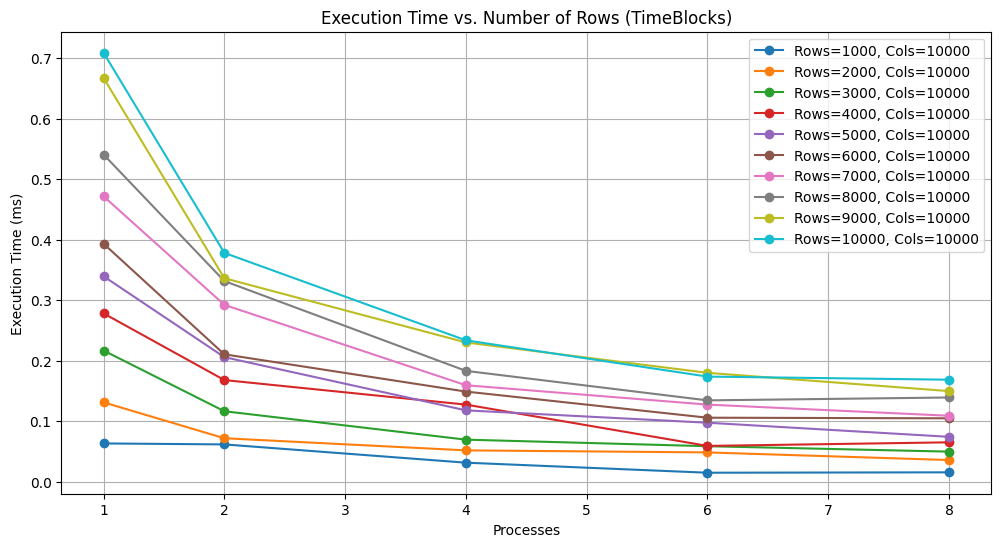

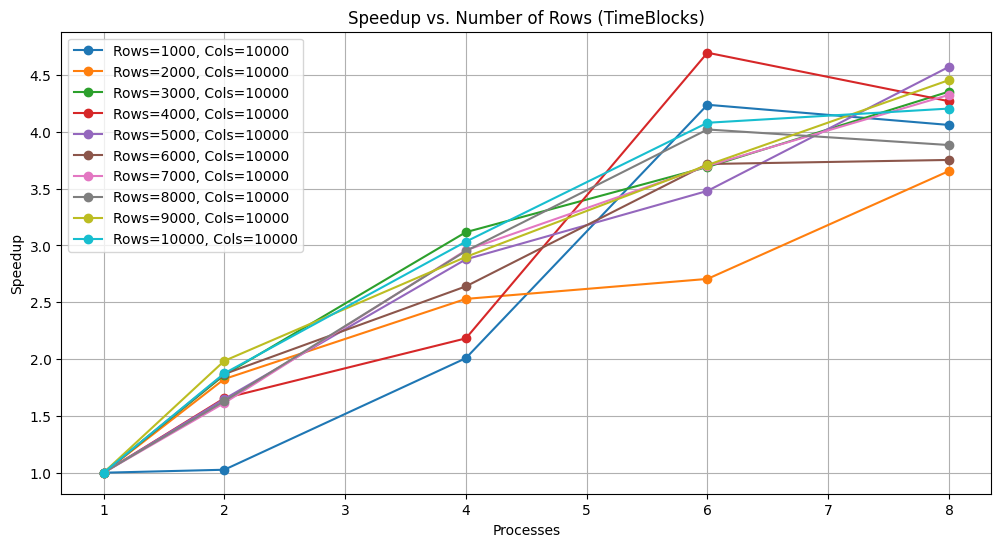

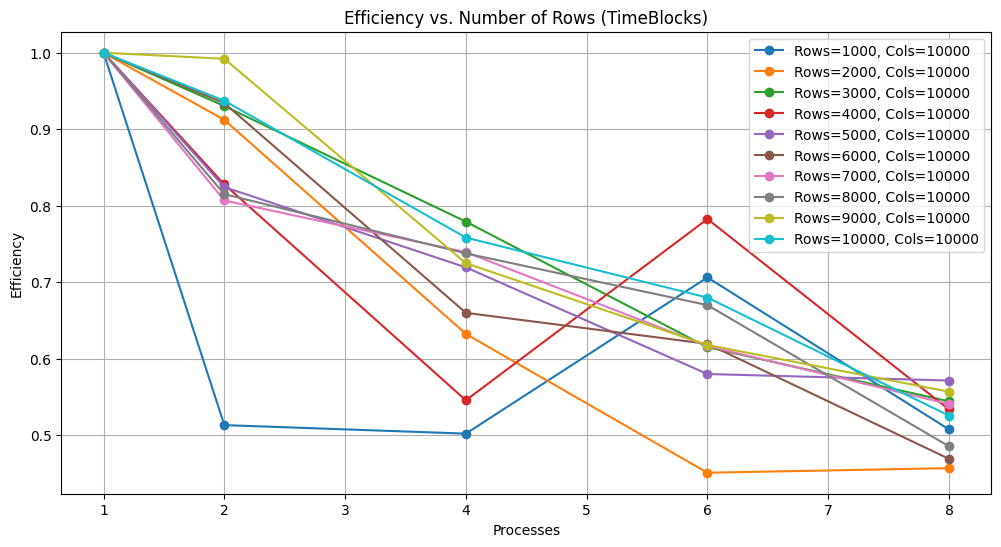

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path, header=None, names=['Processes', 'Rows', 'Cols', 'TimeRows', 'TimeCols', 'TimeBlocks'])
    return data

def calculate_speedup(df, time_col):
        grouped = df.groupby(['Rows', 'Cols'])
        speedup_list = []
        for (rows, cols), group_df in grouped:
        
            base_time = group_df[group_df['Processes'] == 1][time_col].values[0]
            group_df[f'Speedup_{time_col}'] = base_time / group_df[time_col]
            speedup_list.append(group_df)

        result_df = pd.concat(speedup_list, ignore_index=True)
        return result_df


def calculate_efficiency(df, time_col):
    df[f'Efficiency_{time_col}'] = df[f'Speedup_{time_col}'] / df['Processes']
    return df

def plot_results(df, x_col, y_col, title, output_file, ylabel):
    plt.figure(figsize=(12, 6))
    for (rows, cols) in df[['Rows', 'Cols']].drop_duplicates().itertuples(index=False):
        subset = df[(df['Rows'] == rows) & (df['Cols'] == cols)]
        plt.plot(subset[x_col], subset[y_col], marker='o', linestyle='-', label=f'Rows={rows}, Cols={cols}')

    plt.xlabel(x_col)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'data_first/{output_file}')
    plt.show()

file_path = 'data_first/results.csv'
data = load_data(file_path)

time_columns = ['TimeRows', 'TimeCols', 'TimeBlocks']

for time_col in time_columns:
    data = calculate_speedup(data, time_col)
    data = calculate_efficiency(data, time_col)

    # Plot Execution Time
    plot_results(data, 'Processes', time_col, f'Execution Time vs. Number of Rows ({time_col})', f'execution_time_{time_col}_plot.png', 'Execution Time (ms)')

    # Plot Speedup
    plot_results(data, 'Processes', f'Speedup_{time_col}', f'Speedup vs. Number of Rows ({time_col})', f'speedup_{time_col}_plot.png', 'Speedup')

    # Plot Efficiency
    plot_results(data, 'Processes', f'Efficiency_{time_col}', f'Efficiency vs. Number of Rows ({time_col})', f'efficiency_{time_col}_plot.png', 'Efficiency')
